# NAC3 - Aprendizado de maquina

| Nome dos Integrantes     | RM             | Turma   |
| :----------------------- | :------------- | :-----: |
| Camila G. Marraccini      | RM   83209     |    4SIS |
| Carolina Naomi           | RM   83166     |    4SIS |


## Data de entrega final

Será considerado para avaliação e correção o ultimo commit do `** dia 11/09 (domingo) **`

`O grupo deve responder ao Google forms` : [https://forms.gle/EEYUkZiWcJ6Xduah6](https://forms.gle/EEYUkZiWcJ6Xduah6)


## Rubrica 

Os critérios de avaliação do projeto será conforme a rubrica.


- R1: Exploração de Dados (Até 1 ponto)
- R2: Preparação de Dados (Até 2 ponto)
- R3: Desenvolvimento do Modelo (Até 1 ponto)
- R4: Treinamento e Teste do Modelo (Até 2 ponto)
- R5: Validação e Otimização do Modelo (Até 3 ponto)
- R6: Conclusões Finais (Até 1 ponto)
- R7: Deploy (Até 2 pontos *extra) 

Nota_final = R1 + R2 + R3 + R4 + R5 + R6 + R7


``Siga todas as instruções deste noteboook, mas não limite suas análises apenas ao conteúdo visto em aula.``


Nas celulas **Seu Código aqui...** significa que é necessário realizar a implementação de algum código. Utilize quantos blocos julgar necessário para criar o código de resposta.

Nas celulas **Responda** significa que é nessário uma resposta clara e objetiva (pode ser por texto, gráfico, imagem...) para a pergunta.

**Respeite a rubrica e não responda fora de ordem ou sequência**



## Análise preditiva de doeça cardíaca em pacientes

![](coracao.jpg)



Vamos trabalhar com um CONJUNTO DE DADOS DE DOENÇA CARDÍACA afim de ``predizer a presença ou não de doenças do coração em pacientes``.    

[dataset: https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive](https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive).


## 1. Exploração de Dados

Carregue o dataset e faça uma visualização das primeiras linhas (identificação básica apenas confirmar se a base foi carregada corretamente).


In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [167]:
#Seu Código aqui...
data = pd.read_csv('heart_statlog_cleveland_hungary_final2.csv')
display(data.head())

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,class
0,40,male,2,140,289,0,0,172,no,0,1,Normal
1,49,female,3,160,180,0,0,156,no,10,2,heart disease
2,37,male,2,130,283,0,1,98,no,0,1,Normal
3,48,female,4,138,214,0,0,108,yes,15,2,heart disease
4,54,male,3,150,195,0,0,122,no,0,1,Normal


**Pergunta:** Apresente (Escreva) uma descrição dos atributos (colunas) e seu significado:

Exemplo: 

- id: Representa o fabricante
- fuel_type: tipo de combustível (pode ser Gasolina ou Disel)
- price: Representa o valor do carro (**Variável Alvo, atributo que será predito pelo modelo de ML**)

**Responda**

* age = representa a idade do paciente em anos. 
* sex = representa o gênero do paciente (masculino/feminino). 
* chest pain type = representa qual o tipo de dor no peito que o paciente sente, podendo ser até assintomática. 
* resting blood pressure = representa a pressão do sangue do paciente.
* cholesterol = representa o nível de colesterol do paciente.
* fasting blood sugar = representa se o nível de açúcar no sangue do paciente é maior que 120mg (1= true, 0=false).
* resting electrocardiogram results = representa os resultados do eletrocardiograma do paciente, podendo estar normal ou com alterações.
* maximum heart rate achieved = representa o máximo de batimentos cardíacos atingidos pelo paciente por min. 
* exercise induced angina = representa a angina induzida pelo exercício.
* oldpeak = representa o pico antigo aos exames. 
* the slope of the peak exercise ST segment = representa a reação ao exercício de pico.
* class = valor binário que representa se o paciente está saudável ou possui algum problema no coração. 

### Análise profunda dos dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos para compreeder a natureza do problema.

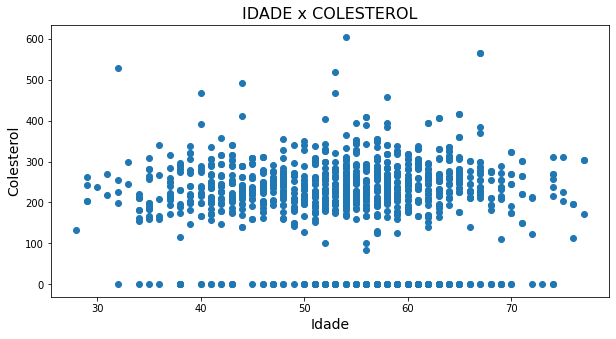

In [168]:
#Seu Código aqui...
plt.figure(figsize = (10,5))
plt.scatter(data['age'], data['cholesterol'])
plt.title('IDADE x COLESTEROL', fontsize = 16)
plt.xlabel('Idade', fontsize = 14)
plt.ylabel('Colesterol', fontsize = 14)
plt.show()

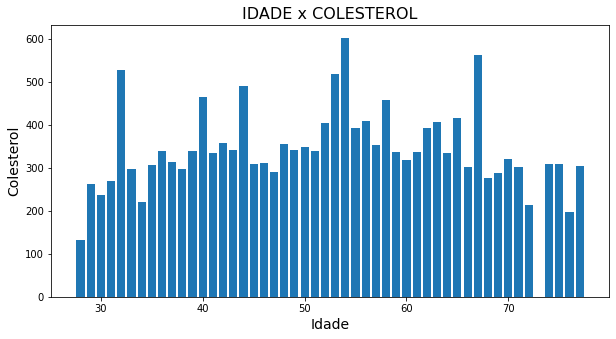

In [169]:
plt.figure(figsize = (10,5))
plt.bar(data['age'], data['cholesterol'])
plt.title('IDADE x COLESTEROL', fontsize = 16)
plt.xlabel('Idade', fontsize = 14)
plt.ylabel('Colesterol', fontsize = 14)
plt.show()

In [170]:
df_fasting_blood_sugar = data.loc[data['fasting blood sugar'] == 1 ]
df_fasting_blood_sugar.sex.value_counts()

male      217
female     37
Name: sex, dtype: int64

In [171]:
data.describe()

,age,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,oldpeak,ST slope
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,3.232773,132.153782,210.363866,0.213445,0.698319,139.210924,8.418487,1.624370
std,9.358203,0.935480,18.368823,101.420489,0.409912,0.870359,39.210094,10.539109,0.610459
min,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-26.000000,0.000000
25%,47.000000,3.000000,120.000000,188.000000,0.000000,0.000000,120.000000,0.000000,1.000000
50%,54.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.000000,4.000000,2.000000
75%,60.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,15.000000,2.000000
max,77.000000,4.000000,200.000000,603.000000,1.000000,2.000000,1071.000000,62.000000,3.000000


In [172]:
display(data.head())

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,class
0,40,male,2,140,289,0,0,172,no,0,1,Normal
1,49,female,3,160,180,0,0,156,no,10,2,heart disease
2,37,male,2,130,283,0,1,98,no,0,1,Normal
3,48,female,4,138,214,0,0,108,yes,15,2,heart disease
4,54,male,3,150,195,0,0,122,no,0,1,Normal


In [173]:
data.loc[data['class'] == 'Normal'].head() 

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,class
0,40,male,2,140,289,0,0,172,no,0,1,Normal
2,37,male,2,130,283,0,1,98,no,0,1,Normal
4,54,male,3,150,195,0,0,122,no,0,1,Normal
5,39,male,3,120,339,0,0,170,no,0,1,Normal
6,45,female,2,130,237,0,0,170,no,0,1,Normal


In [174]:
data.loc[data['class'] == 'heart disease'].head() 

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,class
1,49,female,3,160,180,0,0,156,no,10,2,heart disease
3,48,female,4,138,214,0,0,108,yes,15,2,heart disease
8,37,male,4,140,207,0,0,130,yes,15,2,heart disease
11,58,male,2,136,164,0,1,99,yes,20,2,heart disease
13,49,male,4,140,234,0,0,140,yes,10,2,heart disease


In [175]:
df_heart_disease = data.loc[data['class'] == 'heart disease']
df_heart_disease.sex.value_counts()

male      559
female     70
Name: sex, dtype: int64

**Perguntas:** 

1. Qual a relação entre a idade e colesterol?
2. O indice açucar no sangue > 120 mg/dl é mais frequênte em homens ou mulheres?
3. Qual a distribuição de idade do dataset?
4. Pessoas com presença de doença cardiaca são em sua maioria do grupo masculino ou feminino? 

**Respostas:**

Lembre-se de relacionar sua resposta com os dados. Elabore análises gráficas para te auxiliar.

1. Colesterol alto é mais frequente entre 50 e 60 anos, conforme o gráfico feito acima.
2. Em homens, com 217 registros.
3. Em maioria, pessoas entre os 30 e 70 anos.
4. Masculino, com 559 registros.

## 2. Preparação dos Dados

**Lembre-se:** Trate esses dados dentro do contexto do problema. ``Justifique suas escolhas``.

### Análise de valores inválidos

Faça a análise de dados ausente, dados nulos e dados iguais a 0(zero).

In [176]:
#Seu Código aqui...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  1190 non-null   int64 
 1   sex                  1190 non-null   object
 2   chest pain type      1190 non-null   int64 
 3   resting bp s         1190 non-null   int64 
 4   cholesterol          1190 non-null   int64 
 5   fasting blood sugar  1190 non-null   int64 
 6   resting ecg          1190 non-null   int64 
 7   max heart rate       1190 non-null   int64 
 8   exercise angina      1190 non-null   object
 9   oldpeak              1190 non-null   int64 
 10  ST slope             1190 non-null   int64 
 11  class                1190 non-null   object
dtypes: int64(9), object(3)
memory usage: 111.7+ KB


**Pergunta:** Foram localizados dados ausente, dados nulos e dados iguais a 0(zero)? Se existe, como foram tratados (removidos ou mantidos ou substituidos ou ....)? 

**Resposta:**

Não foram localizados dados nulos ou ausentes. Foram mantidos os dados iguais a 0, por serem valores binários/true/false.

### Análise de Outliers

Faça a análise de outliers.

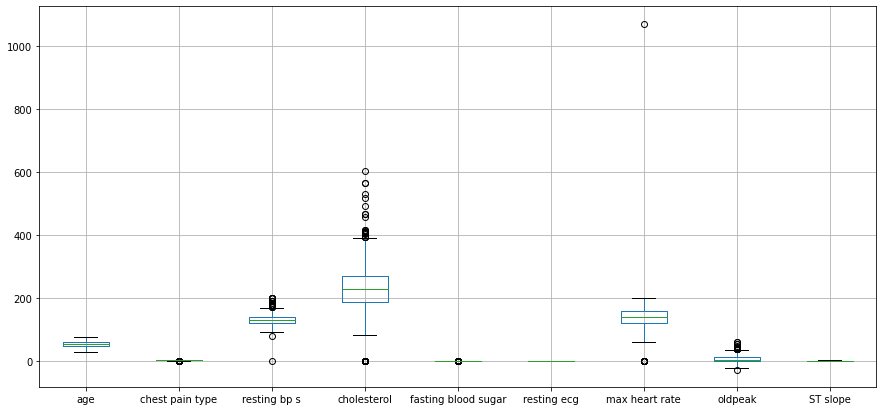

In [177]:
plt.figure(figsize = (15,7))
data.boxplot()
plt.show()

[0, 0, 0, 0, 0, 0, 60, 0, 1071, 0, 0, 0]
12
1.0084033613445378


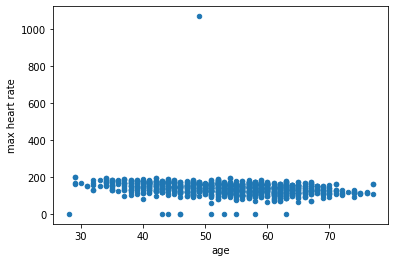

In [178]:
#Seu Código aqui...

data.plot.scatter('age', 'max heart rate')
#IDENTIFICANDO OUTLIERS 
import statistics
outliers = []

desv_pad = statistics.stdev(data['max heart rate'])

# média dos dados
media = statistics.mean(data['max heart rate'])

# coloca o limite que determina se é outlier
limite = desv_pad * 2

limite_inferior = media - limite
limite_superior = media + limite

# Localiza outliers e anexa à nossa lista que iniciamos sem nada
for outlier in data['max heart rate']:
    if outlier > limite_superior or outlier < limite_inferior:
        outliers.append(outlier)

# exibe a lista com os outliers
print(outliers)

# conta quantos elementos são outliers
print(len(outliers))

# percentual da coluna que é outlier
percentual_out = len(outliers)/len(data['max heart rate'])*100
print(percentual_out) 


**Pergunta:** Foram localizados outliers? Se existe, como os dados foram tratados (removidos ou mantidos)? 

**Resposta:**

Como visto no gráfico acima, um paciente tece 'max heart rate' acima de 1000.  Após feito o desvio padrão, foi verificado que 1% da coluna 'max heart rate' possuiu outliers.

- É possível verificar a existência de outliers na maioria das colunas.

### Tratamento de dados Paramétricos

Faça o tratamento dos atributos categoricos, se existir. Manipule de forma conveniente para ser interpretado como um dado numérico.

In [179]:
#Seu Código aqui...
import sklearn
data.head()

#male = 0, female = 1
#class - normal = 0, heart disease =1
#exercise angina - no = 0, yes = 1

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,class
0,40,male,2,140,289,0,0,172,no,0,1,Normal
1,49,female,3,160,180,0,0,156,no,10,2,heart disease
2,37,male,2,130,283,0,1,98,no,0,1,Normal
3,48,female,4,138,214,0,0,108,yes,15,2,heart disease
4,54,male,3,150,195,0,0,122,no,0,1,Normal


**Pergunta:** Quais são os atributos categoricos? Qual foi a técnica de preprocessamento utilizada? 

**Resposta:**


Os atributos categóricos são sex, class e exercise angina.
- Foi usado o método Get_Dummies do pacote Pandas para transformar dados categóricos em valores binários por meio de novas colunas.

### Normalização dos dados

Faça a manipulação adequada para normalizar os dados, se necessário.

#### Definição de X e Y

Separe os subsets dos atributos em Y e X :

- Y = atributo dependente (alvo)
- X = Atributo independente (entradas)

In [180]:
X = data[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']]
display(X.head())

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,male,2,140,289,0,0,172,no,0,1
1,49,female,3,160,180,0,0,156,no,10,2
2,37,male,2,130,283,0,1,98,no,0,1
3,48,female,4,138,214,0,0,108,yes,15,2
4,54,male,3,150,195,0,0,122,no,0,1


In [181]:
y = data['class']
display(y.head())

0           Normal
1    heart disease
2           Normal
3    heart disease
4           Normal
Name: class, dtype: object

- Método Dummies

In [182]:
X_dummies = pd.get_dummies(X)
display(X_dummies.head())

,age,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,oldpeak,ST slope,sex_female,sex_male,exercise angina_no,exercise angina_yes
0,40,2,140,289,0,0,172,0,1,0,1,1,0
1,49,3,160,180,0,0,156,10,2,1,0,1,0
2,37,2,130,283,0,1,98,0,1,0,1,1,0
3,48,4,138,214,0,0,108,15,2,1,0,0,1
4,54,3,150,195,0,0,122,0,1,0,1,1,0


In [183]:
#Seu Código aqui...
from sklearn.preprocessing import normalize
X_norm = normalize(X_dummies)
display(X_norm)

array([[0.10914468, 0.00545723, 0.38200639, ..., 0.00272862, 0.00272862,
        0.        ],
       [0.16821512, 0.01029889, 0.54927387, ..., 0.        , 0.00343296,
        0.        ],
       [0.11260305, 0.00608665, 0.39563236, ..., 0.00304333, 0.00304333,
        0.        ],
       ...,
       [0.25314339, 0.01776445, 0.57734458, ..., 0.00444111, 0.        ,
        0.00444111],
       [0.17496273, 0.00613904, 0.3990378 , ..., 0.        , 0.00306952,
        0.        ],
       [0.13347391, 0.01053741, 0.48472103, ..., 0.00351247, 0.00351247,
        0.        ]])

**Pergunta:** Os dados foram normalizados? Qual foi a técnica de preprocessamento utilizada? 

**Resposta:**

Os dados foram normalizados de forma a padronizar os valores entre 0 e 1 para melhor processamento do modelo de ML, utilizando o método "normalize" do pacote "sklearn.preprocessing".

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [ ] Regressão
    [X] Classificação
    [ ] Clusterização

In [184]:
data['class'].unique()

array(['Normal', 'heart disease'], dtype=object)

**Pergunta:** Escolha 3 modelos de algoritmos de ML para ser testado.

**Resposta:**

1. algoritimo DecisionTree
2. algoritimo RandomForest
3. algoritimo KNeighbors


**Pergunta:** Explique como cada algoritmo funciona.



**Resposta:**

1. Uma Árvore de Decisão usa uma estrutura de árvore para representar um número de "possíveis caminhos de decisão" e um resultado para cada caminho. 
2. Random Forest se resume a criar várias árvores de decisão aleatóriamente, de forma que, ao final de cada uma, realiza uma média de seus resultados para encontrar uma reposta.
3. É um modelo que não possuí de muitas premissas matemáticas, e não requer nenhum tipo de maquinário pesado, apenas:
      - Uma noção de distância;
      - Uma premissa de que pontos que estão perto um do outro são similares.

### Dataset dos dados tratados 

Crie um subset dos dados apenas com os atributos que serão utilizados e exiba as primeiras linhas.

In [185]:
#Seu Código aqui...
display(data.head())
# A princípio, todos os atribuitos (features) serão usadas nos modelos de ML.

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,class
0,40,male,2,140,289,0,0,172,no,0,1,Normal
1,49,female,3,160,180,0,0,156,no,10,2,heart disease
2,37,male,2,130,283,0,1,98,no,0,1,Normal
3,48,female,4,138,214,0,0,108,yes,15,2,heart disease
4,54,male,3,150,195,0,0,122,no,0,1,Normal


### Divisão em treino e teste.

Faça o split do dados para treinamento e teste

In [186]:
#Seu Código aqui...
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.25, random_state = 10)
print(f'Dataset: {data.shape}')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

Dataset: (1190, 12)
X_train: (892, 13)
y_train: (892,)
X_test: (298, 13)
y_test: (298,)


## 4. Treinamento e teste do modelo

Defina a métrica de performance para avaliação dos modelos de ML

**Resposta:**

- 1° Acuracy_Score: realiza a validação dos dados previstos (ypred) com os dados reais (y_test);
- 2° Confusion Matrix: determina os valores de True Positivo, False Positivo, True Negativo e False Negativo, medindo a precisão de determinação do modelo.

### Treinamento e teste

Faça o treinamento e teste de dos 3 algoritmos escolhidos, aplique no treinamento a validação cruzada para um kfold de 5.

### Algoritmo 1 - Decision Tree

In [187]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

Score de treino: 100.00%
Acuracia do modelo DT: 87.92%
[0.81512605 0.81512605 0.8697479  0.90756303 0.97478992]
CV_scores mean: 87.65%
Quantidade de dados de teste: 298


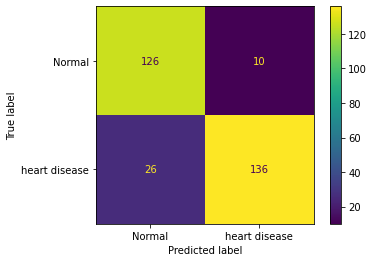

In [188]:
#Seu Código aqui...
from sklearn.tree import DecisionTreeClassifier
modelo_tree = DecisionTreeClassifier(random_state = 1024)
modelo_tree.fit(X_train, y_train)
ypred = modelo_tree.predict(X_test)
# Testando a acuracia do modelo
score_train = modelo_tree.score(X_train, y_train)
print(f'Score de treino: {score_train:.2%}')

acuracia_test = accuracy_score(y_test, ypred)
print(f'Acuracia do modelo DT: {acuracia_test:.2%}')

# Validação Cruzada
cv_scores = cross_val_score(modelo_tree, X_norm, y, cv=5)
print(cv_scores)
print(f'CV_scores mean: {np.mean(cv_scores):.2%}')

# Confusion Matrix
cm = confusion_matrix(y_test, ypred, labels=modelo_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_tree.classes_)
disp.plot()

print(f'Quantidade de dados de teste: {y_test.shape[0]}')

### Algoritmo 2 - Random Forest

Score de treino: 100.00%
Acuracia do modelo DT: 93.62%
[0.8697479  0.85294118 0.94957983 0.94117647 0.96638655]
CV_scores mean: 91.60%
Quantidade de dados de teste: 298


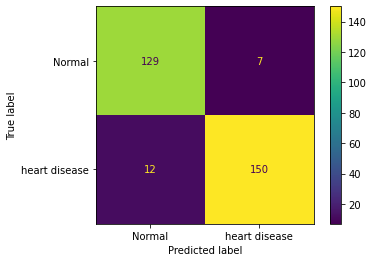

In [189]:
#Seu Código aqui...
from sklearn.ensemble import RandomForestClassifier
modelo_random = RandomForestClassifier(random_state = 1024)
modelo_random.fit(X_train, y_train)
ypred = modelo_random.predict(X_test)

# Testando a acuracia do modelo
score_train = modelo_random.score(X_train, y_train)
print(f'Score de treino: {score_train:.2%}')

acuracia_test = accuracy_score(y_test, ypred)
print(f'Acuracia do modelo DT: {acuracia_test:.2%}')

# Validação Cruzada
cv_scores = cross_val_score(modelo_random, X_norm, y, cv=5)
print(cv_scores)
print(f'CV_scores mean: {np.mean(cv_scores):.2%}')

# Confusion Matrix
cm = confusion_matrix(y_test, ypred, labels=modelo_random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_random.classes_)
disp.plot()

print(f'Quantidade de dados de teste: {y_test.shape[0]}')

### Algoritmo 3 - KNeighbors

Score de treino: 78.48%
Acuracia do modelo DT: 80.87%
[0.73109244 0.76470588 0.79411765 0.70168067 0.69327731]
CV_scores mean: 73.70%
Quantidade de dados de teste: 298


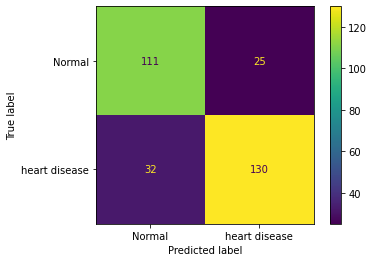

In [190]:
#Seu Código aqui...
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors=9)
modelo_knn.fit(X_train, y_train)
ypred = modelo_knn.predict(X_test)

# Testando a acuracia do modelo
score_train = modelo_knn.score(X_train, y_train)
print(f'Score de treino: {score_train:.2%}')

acuracia_test = accuracy_score(y_test, ypred)
print(f'Acuracia do modelo DT: {acuracia_test:.2%}')

# Validação Cruzada
cv_scores = cross_val_score(modelo_knn, X_norm, y, cv=5)
print(cv_scores)
print(f'CV_scores mean: {np.mean(cv_scores):.2%}')

# Confusion Matrix
cm = confusion_matrix(y_test, ypred, labels=modelo_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_knn.classes_)
disp.plot()

print(f'Quantidade de dados de teste: {y_test.shape[0]}')

Sumarize na tabela abaixo os resultados obtidos dos modelos de ML para o conjuntos de dados de treino e de testes

**Resposta:**

|                     | DecisionTree | RandomForest | KNeighbors |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| treino |      100%           |      100%                       |   78,48%              |
| teste  |      87,92%            |      93.62%                       |   80,87%              |


**Pergunta:** Qual foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:**
Os algorítimo de DecisionTree e RandomForest apresentaram 100% no score de treino, enquanto o algorítimo KNeighbors apresentou 78,48%, um valor inferior. No teste, quem teve o melhor resultado de acurácia foi o algorítimo RandomForest com 93,62%, enquanto os outros dois ficaram na casa dos 80%.

## 5. Validação e Otimização do Modelo

Faça a otimização dos modelos, tunning dos hiperparametros, utilize uma das técinicas: **RandomSearchCV** ou **GridSearchCV**.


Após a otimização dos parametros, treine novamente os 3 algoritmos de ML  utilizando os parametos de otimização e compares seus resultados.


**Pergunta:** Qual a técnica escolhida? Por que?

**Resposta:** Foram testados as duas técnicas de otimização de modelos: GridSearchCV e RandomSearchCV. Devido a quantidade de dados não ser tão elevado, a performace da técnica GridSearchCV apresentou maior resultado, sendo também um ponto a mais a velocidade de execução, ou seja, devido a quantidade de informação e a velocidade performática, o método GridSearch é o que melhor atende a este caso.

In [191]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Algoritmo 1 - Decision Tree

- Hiperparâmetros Decision Tree:

In [192]:
rf_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001, .0001, .00001],
              'max_depth' : [5, 6, 7, 8, 9, 10, 11, 12],
              'criterion' :['gini', 'entropy']
             }

##### GridSearchCV

In [193]:
#Seu Código aqui...
import warnings
warnings.filterwarnings('ignore')

grid_search = GridSearchCV(estimator=modelo_tree, param_grid=rf_grid, cv=5, verbose=True)

# Treinando o modelo
grid_search.fit(X_train, y_train)

# Entrega os melhores parâmetros mais adequados para o modelo
final_model = grid_search.best_estimator_
final_model

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=11,
                       max_features='auto', random_state=1024)

Score de treino: 97.53%
Acuracia do modelo DecisionTree: 86.24%

Quantidade de dados de teste: 298


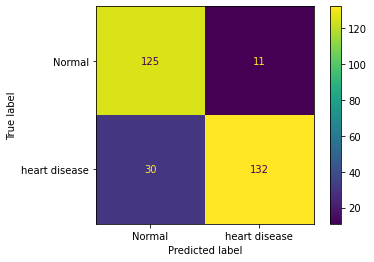

In [194]:
model_grid_tree = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=11,
                       max_features='auto', random_state=1024)
model_grid_tree.fit(X_train, y_train)
ypred = model_grid_tree.predict(X_test)

# Testando a acuracia do modelo
score_train = model_grid_tree.score(X_train, y_train)
print(f'Score de treino: {score_train:.2%}')

acuracia_test = accuracy_score(y_test, ypred)
print(f'Acuracia do modelo DecisionTree: {acuracia_test:.2%}')
print()
# Confusion Matrix
cm = confusion_matrix(y_test, ypred, labels=model_grid_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_grid_tree.classes_)
disp.plot()

print(f'Quantidade de dados de teste: {y_test.shape[0]}')

##### RandomSearchCV

In [195]:
random_search = RandomizedSearchCV(estimator = modelo_tree, param_distributions= rf_grid, 
                                   scoring= 'accuracy', cv = 5)

# Treinando o modelo
random_search.fit(X_train, y_train)

# Entrega os melhores parâmetros mais adequados para o modelo
final_model = random_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=1e-05, max_depth=9, max_features='sqrt',
                       random_state=1024)

Score de treino: 100.00%
Acuracia do modelo RandomForest: 93.62%

Quantidade de dados de teste: 298


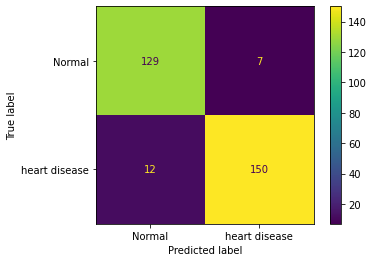

In [196]:
model_random_tree = RandomForestClassifier(ccp_alpha=0.0001, max_depth=12, max_features='log2',
                       random_state=1024)
model_random_tree.fit(X_train, y_train)
ypred = model_random_tree.predict(X_test)

# Testando a acuracia do modelo
score_train = model_random_tree.score(X_train, y_train)
print(f'Score de treino: {score_train:.2%}')

acuracia_test = accuracy_score(y_test, ypred)
print(f'Acuracia do modelo RandomForest: {acuracia_test:.2%}')
print()

# Confusion Matrix
cm = confusion_matrix(y_test, ypred, labels=model_random_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_random_tree.classes_)
disp.plot()

print(f'Quantidade de dados de teste: {y_test.shape[0]}')

### Algoritmo 2 - Random Forest

- Hiperparâmetros RandomForest:

In [197]:
rf_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001, .0001, .00001],
              'max_depth' : [5, 6, 7, 8, 9, 10, 11, 12],
              'criterion' :['gini', 'entropy']
             }

##### GridSearchCV

In [198]:
#Seu Código aqui...
grid_search = GridSearchCV(estimator=modelo_random, param_grid=rf_grid, cv=5, verbose=True)

# Treinando o modelo
grid_search.fit(X_train, y_train)

# Entrega os melhores parâmetros mais adequados para o modelo
final_model = grid_search.best_estimator_
final_model

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


RandomForestClassifier(ccp_alpha=0.0001, max_depth=11, max_features='auto',
                       random_state=1024)

Score de treino: 100.00%
Acuracia do modelo RandomForest: 94.30%

Quantidade de dados de teste: 298


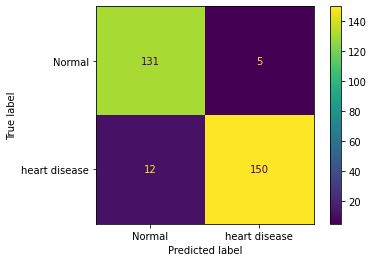

In [199]:
model_grid_random = RandomForestClassifier(ccp_alpha=0.0001, max_depth=11,
                       random_state=1024)
model_grid_random.fit(X_train, y_train)
ypred = model_grid_random.predict(X_test)

# Testando a acuracia do modelo
score_train = model_grid_random.score(X_train, y_train)
print(f'Score de treino: {score_train:.2%}')

acuracia_test = accuracy_score(y_test, ypred)
print(f'Acuracia do modelo RandomForest: {acuracia_test:.2%}')
print()

# Confusion Matrix
cm = confusion_matrix(y_test, ypred, labels=model_grid_random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_grid_random.classes_)
disp.plot()

print(f'Quantidade de dados de teste: {y_test.shape[0]}')

##### RandomSearchCV

In [200]:
random_search = RandomizedSearchCV(estimator = modelo_random, param_distributions= rf_grid, 
                                   scoring= 'accuracy', cv = 5)

# Treinando o modelo
random_search.fit(X_train, y_train)

# Entrega os melhores parâmetros mais adequados para o modelo
final_model = random_search.best_estimator_
final_model

RandomForestClassifier(ccp_alpha=0.001, max_depth=12, max_features='auto',
                       random_state=1024)

Score de treino: 99.78%
Acuracia do modelo RandomForest: 93.29%

Quantidade de dados de teste: 298


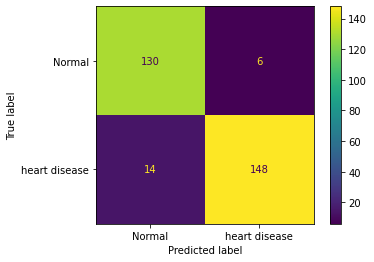

In [201]:
model_random_random = RandomForestClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=11,
                       max_features='log2', random_state=1024)
model_random_random.fit(X_train, y_train)
ypred = model_random_random.predict(X_test)

# Testando a acuracia do modelo
score_train = model_random_random.score(X_train, y_train)
print(f'Score de treino: {score_train:.2%}')

acuracia_test = accuracy_score(y_test, ypred)
print(f'Acuracia do modelo RandomForest: {acuracia_test:.2%}')
print()

# Confusion Matrix
cm = confusion_matrix(y_test, ypred, labels=model_random_random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_random_random.classes_)
disp.plot()

print(f'Quantidade de dados de teste: {y_test.shape[0]}')

### Algoritmo 3 - KNN

##### GridSearchCV

In [202]:
#Seu Código aqui...
k_range = list(range(1,50))
param_grid = dict(n_neighbors = k_range)

model_grid_knn = GridSearchCV(modelo_knn, param_grid, scoring = 'accuracy', cv = 5, return_train_score=False, verbose=1)

# Treinando o modelo
model_grid_knn.fit(X_train, y_train)

print(model_grid_knn.best_params_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
{'n_neighbors': 1}


Score de treino: 100.00%
Acuracia do modelo DT: 81.21%

Quantidade de dados de teste: 298


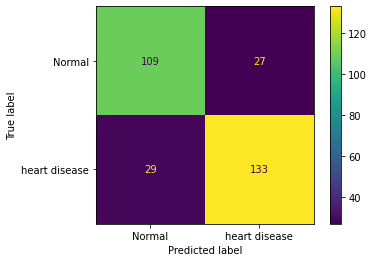

In [203]:
modelo_knn = KNeighborsClassifier(n_neighbors=1)
modelo_knn.fit(X_train, y_train)

# Predizendo novos valores
ypred = model_grid_knn.predict(X_test)

# Testando a acuracia do modelo
score_train = modelo_knn.score(X_train, y_train)
print(f'Score de treino: {score_train:.2%}')

acuracia_test = accuracy_score(y_test, ypred)
print(f'Acuracia do modelo DT: {acuracia_test:.2%}')
print()

# Confusion Matrix
cm = confusion_matrix(y_test, ypred, labels=model_grid_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_grid_knn.classes_)
disp.plot()

print(f'Quantidade de dados de teste: {y_test.shape[0]}')

Sumarize na tabela abaixo os resultados obtidos dos modelos de ML para o conjuntos de dados de treino e de testes

**Resposta:**

|                     | DecisionTree | RandomForest | KNeighbors |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| treino |      97,53%           |      100%                       |   100%              |
| teste  |      86,24%            |      94,30%                       |   81,21%              |


**Pergunta:** Qual dos algoritmos obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:** Os algorítimo de RandomForest e KNeighbors apresentaram 100% no score de treino, enquanto o algorítimo DecisionTree apresentou 93,53%, um valor inferior. No teste, quem teve o melhor resultado de acurácia foi o algorítimo RandomForest com 94,30%, enquanto os outros dois ficaram na casa dos 80%.

## Salvando o modelo desenvolvido

Configure o modelo selecionado com os parâmetros otimizados obtidos anteriormente e salve

```python
# exemplo de como salvar o modelo "model" no arquivo "modelsave.pkl"

# import lib
import pickle

# salvar
with open('modelsave.pkl', 'wb') as file:
    pickle.dump(model, file)

```

In [204]:
#Seu Código aqui...
# import lib
import pickle

# salvar
with open('modelsave.pkl', 'wb') as file:
    pickle.dump(model_grid_random, file)

## 6. Conclusões finais

Ufa!!... Chegamos ao final deste projeto. Parabéns! De forma simplificada e completa passamos por todas as etapas de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.

**Pergunta:** O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Sim, tivemos um resultado satisfatório com o modelo desenvolvido, pois fizemos a exploração dos dados, preparação dos dados, desenvolvimento dos modelos, treinamento e teste dos modelos e a validação e otimização dos modelos. Em ambos os casos (Treinamento e teste do modelo e Validação e Otimização do Modelo), o RandomForest obteve o melhor resultado.

**Pergunta:** O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Tentariamos utilizar outros algorítmos para verificar se teriamos um resultado mais preciso do que os que foram testados.

**Pergunta:** As etapas de desenvolvimento se aplicam para um problema de classificação? Justifique:

**Resposta**: Sim, pois os modelos de classificação são do tipo supervisionado e predizem resultados de tipo classe. Isso significa que um modelo de classificação vai prever qualquer tipo de categoria ou classe, tal como tipo de objeto ou classificação.

## 7. Deploy 

Etapa bonûs (Até 2 pontos *extra)

Essa parte não é obrigatória, por esse motivo é considerada pontuação extra na nota para quem desenvolver.


Faça o deploy do modelo de ML desenvolvido em um webserver. Como sugestão utilize Flask ou FastAPI ou Django. Procure por referências na web.

In [ ]:
#instalar o pip install streamlit

In [208]:
import joblib
joblib.dump(model_grid_random, 'modelo.joblin')